In [13]:
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/11%20Optimizaci%C3%B3n%20Basada%20en%20Ense%C3%B1anza-Aprendizaje/C%C3%B3digos/Plot_Contour.py'
!wget -nc 'https://raw.githubusercontent.com/Jegovila/SSPIA1/main/11%20Optimizaci%C3%B3n%20Basada%20en%20Ense%C3%B1anza-Aprendizaje/C%C3%B3digos/Plot_Surf.py'

import matplotlib.pyplot as plt
import numpy as np
from Plot_Surf import *
from Plot_Contour import *
from IPython import display

File ‘Plot_Contour.py’ already there; not retrieving.

File ‘Plot_Surf.py’ already there; not retrieving.



Funciones objetivo

In [24]:
#f = lambda x, y: ((x**2/4000)+(y**2/4000))-(np.cos(x)*np.cos(y/np.sqrt(2)))+1  #Griewank
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)    #Rastrigin
f = lambda x, y: (x**2)+(y**2)   #Sphere


#f = lambda x, y: (x-2)**2 + (y-2)**2
#f = lambda x, y: 10*2 + x**2 + y**2 - 10*np.cos(2*np.pi*x) - 10*np.cos(2*np.pi*y)

Parámetros

In [15]:
xl = np.array([-5, -5])
xu = np.array([5, 5])

D = 2
N = 30
G = 31

x = np.zeros((D, N))
fitness = np.zeros(N)

# TLBO

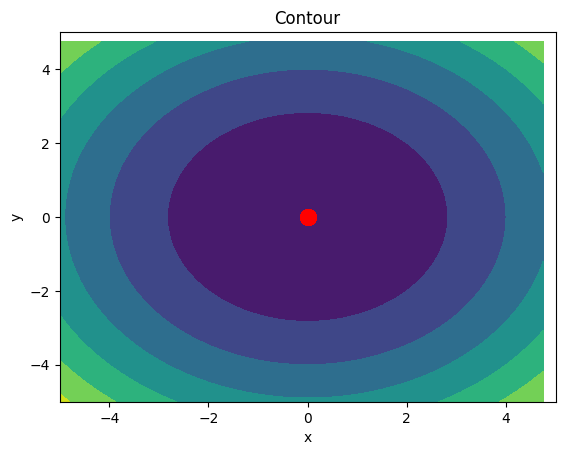

Mínimo global en x= -7.791974745871758e-08  y= -4.5222612668060807e-07  f(x,y)= 2.1057995669657572e-13


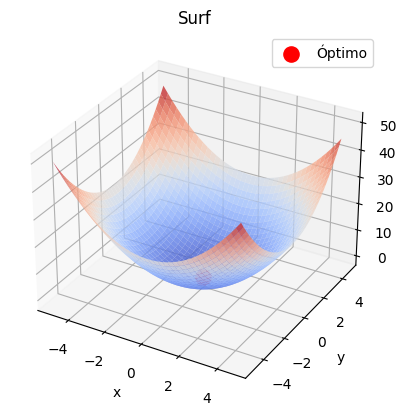

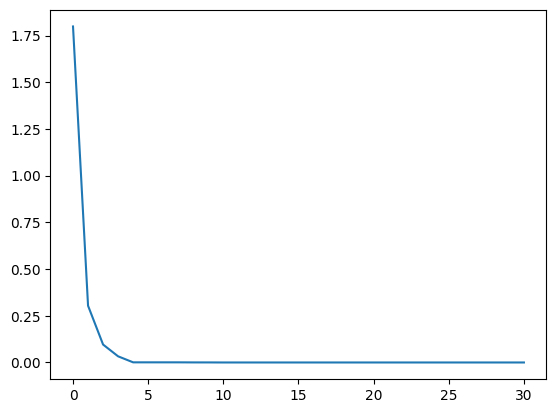

In [25]:
for i in range(N):
    x[:, i] = xl + (xu - xl) * np.random.rand(D)
    fitness[i] = f(x[0, i], x[1, i])

fx_plot = np.zeros(G)

for g in range(G):
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plot_contour(f, x, xl, xu)

    for i in range(N):
        # Teacher phase
        t = np.argmin(fitness)
        Tf = np.random.randint(2)
        c = np.zeros(D)

        for j in range(D):
            x_mean = np.mean(x[j, :])
            r = np.random.rand()

            c[j] = x[j, i] + r * (x[j, t] - Tf * x_mean)

        fc = f(c[0], c[1])

        if fc < fitness[i]:
            x[:, i] = c
            fitness[i] = fc

        # Learner phase
        k = i
        while k == i:
            k = np.random.randint(N)

        c = np.zeros(D)

        if fitness[i] < fitness[k]:
            for j in range(D):
                r = np.random.rand()
                c[j] = x[j, i] + r * (x[j, i] - x[j, k])
        else:
            for j in range(D):
                r = np.random.rand()
                c[j] = x[j, i] + r * (x[j, k] - x[j, i])

        fc = f(c[0], c[1])

        if fc < fitness[i]:
            x[:, i] = c
            fitness[i] = fc

    fx_plot[g] = np.min(fitness)

igb = np.argmin(fitness)

print("Mínimo global en x=", x[0, igb], " y=", x[1, igb], " f(x,y)=", f(x[0, igb], x[1, igb]))
plot_surf(f, x, xl, xu, igb)
plt.plot(fx_plot)